In [1]:
# Description: Plot Figure 6 (Comparison between two-layer flat-bottom, two-layer rough bottom and 1.5-layer [no topography] experiments, varying background jet width).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        March/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cmocean.cm import balance
from matplotlib.ticker import FuncFormatter

In [3]:
def near(x, x0, npts=1, return_index=False):
    """
    USAGE
    -----
    xnear = near(x, x0, npts=1, return_index=False)

    Finds 'npts' points (defaults to 1) in array 'x'
    that are closest to a specified 'x0' point.
    If 'return_index' is True (defauts to False),
    then the indices of the closest points are
    returned. The indices are ordered in order of
    closeness.
    """
    x = list(x)
    xnear = []
    xidxs = []
    for n in range(npts):
        idx = np.nanargmin(np.abs(np.array(x)-x0))
        xnear.append(x.pop(idx))
        if return_index:
            xidxs.append(idx)
    if return_index: # Sort indices according to the proximity of wanted points.
        xidxs = [xidxs[i] for i in np.argsort(xnear).tolist()]
    xnear.sort()

    if npts==1:
        xnear = xnear[0]
        if return_index:
            xidxs = xidxs[0]
    else:
        xnear = np.array(xnear)

    if return_index:
        return xidxs
    else:
        return xnear


def normalize_psi(psis):
    maxp = 0
    for k in psis.keys():
        maxpk = np.abs(psis[k]).max()
        if maxpk>maxp:
            maxp = maxpk

    for k in psis.keys():
        psis[k] = psis[k]/maxp

    return psis


def get_max_psi(psis):
    maxp = 0
    for k in psis.keys():
        maxpk = np.abs(psis[k]).max()
        if maxpk>maxp:
            maxp = maxpk

    return maxp


def getLjtxt(Ljtxt):
    if Ljtxt==1:
        txt = ""
    else:
        txt = str(round(Ljtxt, 1))

    return txt

In [4]:
plt.close("all")

F1a, F1b, F1c = 20, 25, 50
NORMALIZE_PSI = True
cmap = balance

head = "../../simulations"
N = 256
L = 2
dx = L/N
x = np.arange(0, N)
x, y = np.meshgrid(x*dx, x*dx - L/2)

In [5]:
# Narrow jet.
fname = head+"/lin_N256_ht0_F1%d_cosi10.npz"%F1a
d = np.load(fname); psi1_flatbot = d["p1"]
fname = head+"/lin_N256_ht10_F1%d_cosi10.npz"%F1a
d = np.load(fname); psi1_talltopo = d["p1"]
fname = head+"/lin_onehalflay_N256_F%d.npz"%F1a
d = np.load(fname); psi1_onehalflay = d["p"]
psis_narrow = dict(psi1_flatbot=psi1_flatbot, psi1_talltopo=psi1_talltopo, psi1_onehalflay=psi1_onehalflay)

# Medium jet.
fname = head+"/lin_N256_ht0_F1%d_cosi10.npz"%F1b
d = np.load(fname); psi1_flatbot = d["p1"]
fname = head+"/lin_N256_ht10_F1%d_cosi10.npz"%F1b
d = np.load(fname); psi1_talltopo = d["p1"]
fname = head+"/lin_onehalflay_N256_F%d.npz"%F1b
d = np.load(fname); psi1_onehalflay = d["p"]
psis_medium = dict(psi1_flatbot=psi1_flatbot, psi1_talltopo=psi1_talltopo, psi1_onehalflay=psi1_onehalflay)

# Wide jet.
fname = head+"/lin_N256_ht0_F1%d_cosi10.npz"%F1c
d = np.load(fname); psi1_flatbot = d["p1"]
fname = head+"/lin_N256_ht10_F1%d_cosi10.npz"%F1c
d = np.load(fname); psi1_talltopo = d["p1"]
fname = head+"/lin_onehalflay_N256_F%d.npz"%F1c
d = np.load(fname); psi1_onehalflay = d["p"]
psis_wide = dict(psi1_flatbot=psi1_flatbot, psi1_talltopo=psi1_talltopo, psi1_onehalflay=psi1_onehalflay)

if NORMALIZE_PSI:
    psis_narrow = normalize_psi(psis_narrow)
    psis_medium = normalize_psi(psis_medium)
    psis_wide = normalize_psi(psis_wide)
    maxpsi = 1
else:
    maxpsi_narrow = get_max_psi(psis_narrow)
    maxpsi_medium = get_max_psi(psis_medium)
    maxpsi_wide = get_max_psi(psis_wide)
    maxpsi = np.maximum(np.array([maxpsi_narrow]), np.array([maxpsi_medium]), np.array([maxpsi_wide]))

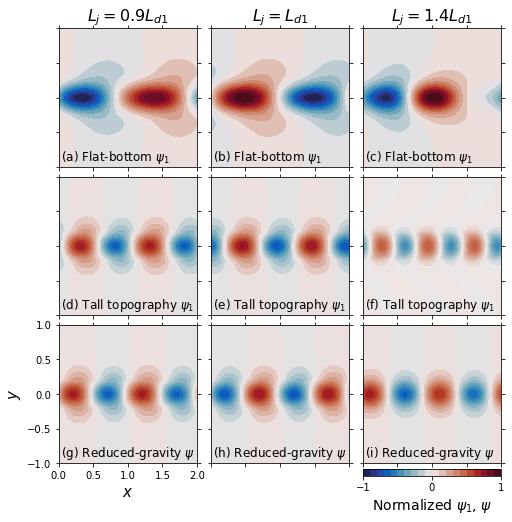

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
ax1, ax2, ax3 = ax[0]
ax4, ax5, ax6 = ax[1]
ax7, ax8, ax9 = ax[2]

nlevs = 20
kwcc = dict(levels=nlevs, vmin=-maxpsi, vmax=maxpsi, cmap=cmap)
carr = np.linspace(-maxpsi, maxpsi, num=nlevs)

cs1 = ax1.contourf(x, y, psis_narrow["psi1_flatbot"], **kwcc); cs1.set_array(carr)
cs4 = ax4.contourf(x, y, psis_narrow["psi1_talltopo"], **kwcc); cs4.set_array(carr)
cs7 = ax7.contourf(x, y, psis_narrow["psi1_onehalflay"], **kwcc); cs7.set_array(carr)

cs2 = ax2.contourf(x, y, psis_medium["psi1_flatbot"], **kwcc); cs2.set_array(carr)
cs5 = ax5.contourf(x, y, psis_medium["psi1_talltopo"], **kwcc); cs5.set_array(carr)
cs8 = ax8.contourf(x, y, psis_medium["psi1_onehalflay"], **kwcc); cs8.set_array(carr)

cs3 = ax3.contourf(x, y, psis_wide["psi1_flatbot"], **kwcc); cs3.set_array(carr)
cs6 = ax6.contourf(x, y, psis_wide["psi1_talltopo"], **kwcc); cs6.set_array(carr)
cs9 = ax9.contourf(x, y, psis_wide["psi1_onehalflay"], **kwcc); cs9.set_array(carr)
cs = cs2

caxx, caxy = 0.0, -0.09
cbaxes = ax9.inset_axes([caxx, caxy, 1.0, 0.05])
if NORMALIZE_PSI:
    cb = fig.colorbar(mappable=cs, cax=cbaxes, orientation="horizontal")
    cblabel = r"Normalized $\psi_1$, $\psi$"
else:
    cb = fig.colorbar(mappable=cs, cax=cbaxes, orientation='horizontal', extend='both', format=FuncFormatter(cbfmt))
    cblabel = r"$\psi_1$, $\psi$"
cb.ax.xaxis.set_ticks_position("bottom"); cb.ax.xaxis.set_label_position("bottom")
cb.set_ticks([-maxpsi, 0, maxpsi])
cb.set_label(cblabel, fontsize=14, fontweight="normal")

axsaux = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9)
for axaux in axsaux:
    axaux.axis("square")
    axaux.tick_params(bottom=True, top=True, left=True, right=True)
    axaux.set_xlim(0, 2)
    axaux.set_ylim(-1, 1)
axsaux = (ax1, ax2, ax3, ax4, ax5, ax6, ax8, ax9)
for axaux in axsaux:
    axaux.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

xt, yt = 0.015, 0.05
kwtxt = dict(fontsize=12, fontweight="normal")
ax1.text(xt, yt, r"(a) Flat-bottom $\psi_1$", transform=ax1.transAxes, **kwtxt)
ax2.text(xt, yt, r"(b) Flat-bottom $\psi_1$", transform=ax2.transAxes, **kwtxt)
ax3.text(xt, yt, r"(c) Flat-bottom $\psi_1$", transform=ax3.transAxes, **kwtxt)
ax4.text(xt, yt, r"(d) Tall topography $\psi_1$", transform=ax4.transAxes, **kwtxt)
ax5.text(xt, yt, r"(e) Tall topography $\psi_1$", transform=ax5.transAxes, **kwtxt)
ax6.text(xt, yt, r"(f) Tall topography $\psi_1$", transform=ax6.transAxes, **kwtxt)
ax7.text(xt, yt, r"(g) Reduced-gravity $\psi$", transform=ax7.transAxes, **kwtxt)
ax8.text(xt, yt, r"(h) Reduced-gravity $\psi$", transform=ax8.transAxes, **kwtxt)
ax9.text(xt, yt, r"(i) Reduced-gravity $\psi$", transform=ax9.transAxes, **kwtxt)

LjonLd1s = np.sqrt([F1a, F1b, F1c])/5
kw = dict(fontsize=16, pad=8)
ax1.set_title(r"$L_j = %sL_{d1}$"%getLjtxt(LjonLd1s[0]), **kw)
ax2.set_title(r"$L_j = %sL_{d1}$"%getLjtxt(LjonLd1s[1]), **kw)
ax3.set_title(r"$L_j = %sL_{d1}$"%getLjtxt(LjonLd1s[2]), **kw)
ax7.set_xlabel(r"$x$", fontsize=15, fontweight="black")
ax7.set_ylabel(r"$y$", fontsize=15, fontweight="black")

fig.subplots_adjust(wspace=0.07, hspace=0.07)
fig.savefig("fig06.png", bbox_inches="tight")

plt.show()